In [50]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import gaussian

plt.rcParams.update({'font.size': 30})

In [26]:
def normImage(G_R):
    G_R = (G_R - np.min(G_R.reshape(-1)))/(np.max(G_R.reshape(-1)) - np.min(G_R.reshape(-1)))
    x1 = np.percentile(G_R.reshape(-1), 1)
    x2 = np.percentile(G_R.reshape(-1), 99)
    G_R = np.clip(G_R, x1, x2)
    G_R = (G_R - np.min(G_R.reshape(-1)))/(np.max(G_R.reshape(-1)) - np.min(G_R.reshape(-1)))
    return G_R

In [60]:
I = Image.open('/media/cibitaw1/datasets/OcularNetV2/visob/imgs/EC_VISIT_1/OPPO/dark/S1/1166_l_7.png')

In [3]:
I1 = np.float32(I)/255.0

In [28]:
I1.shape

(216, 216)

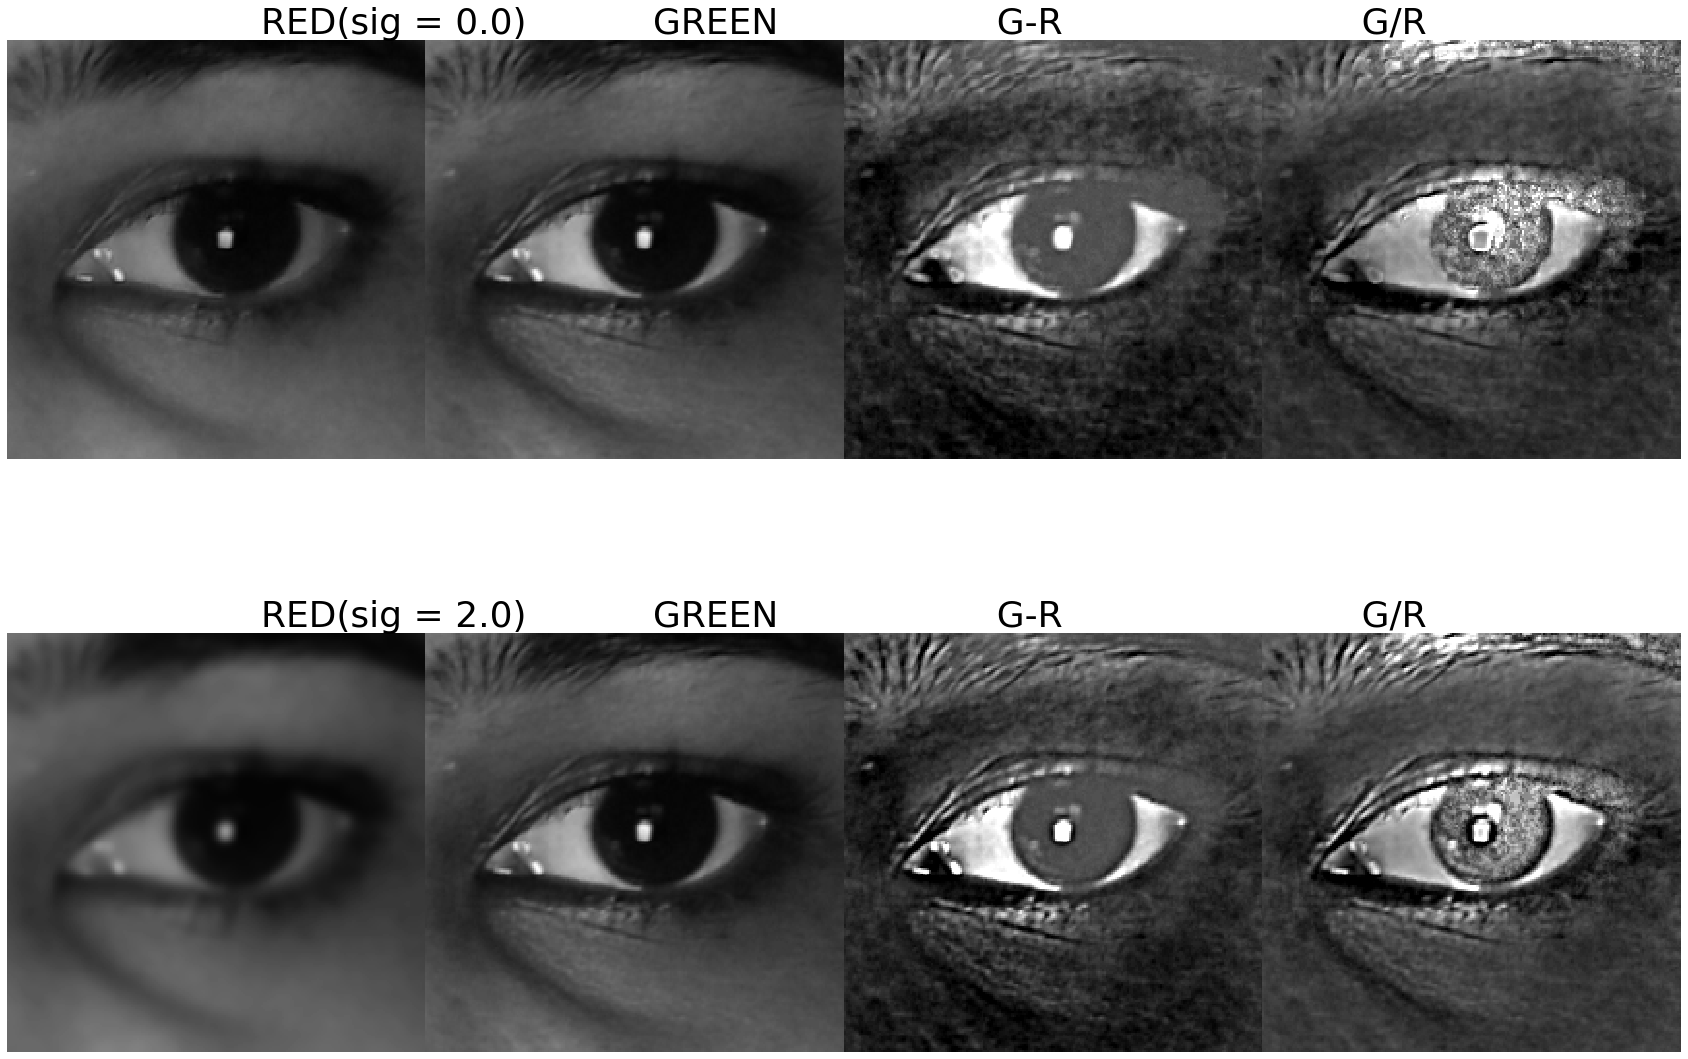

In [61]:
plt.figure(figsize=(30, 20))
c = 0
for sig in [0.0, 2.0]:
    plt.subplot(2, 1, c+1)
    I1 = np.float32(I.convert('L'))/255.0
    I2 = np.float32(I)/255.0
    G_R_1 = I2[..., 1] - gaussian(I2[..., 0], sig)
    G_R_1 = np.float32(normImage(G_R_1))
    G_R_2 = I2[..., 1]/(gaussian(I2[..., 0], sig) + 1e-5)
    G_R_2 = np.float32(normImage(G_R_2))
    X = np.concatenate((gaussian(I2[..., 0], sig), I2[..., 1], G_R_1, G_R_2), axis = -1)
    plt.imshow(X, cmap = 'gray')
    plt.axis('off')
    plt.title('RED(sig = '+str(sig)+')           GREEN                   G-R                          G/R')
    c += 1

In [58]:
x1

0.362913652792573

In [59]:
x2

0.6370936007499696

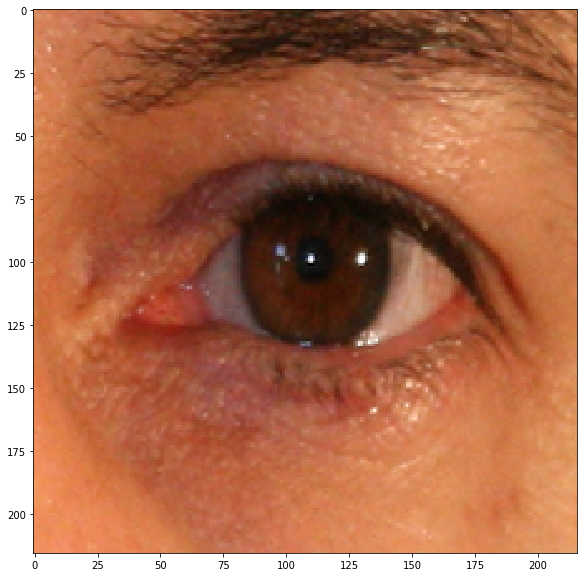

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(I)

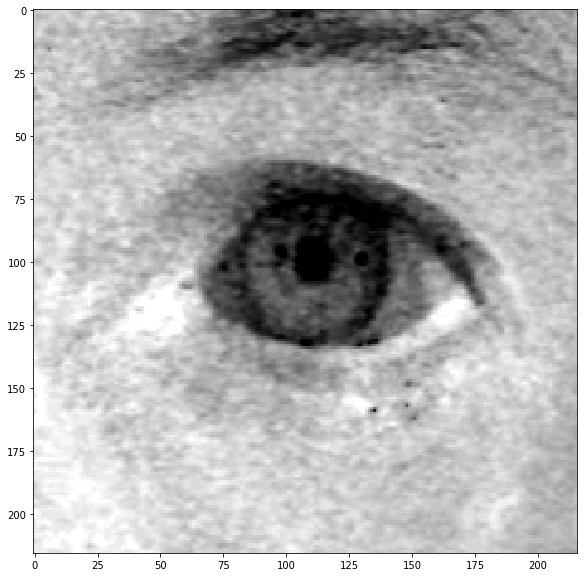

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(G_R, cmap = 'gray')

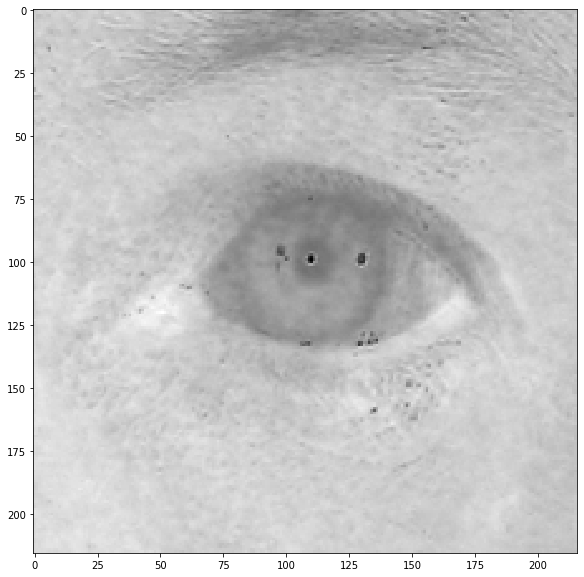

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(G_R, cmap = 'gray')

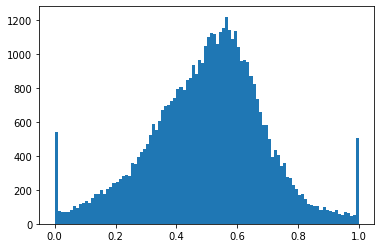

In [17]:
x = plt.hist(G_R.reshape(-1), bins = 100)

In [67]:
np.percentile(G_R.reshape(-1), 5)

0.6844645291566849

In [68]:
np.percentile(G_R.reshape(-1), 95)

0.9388016015291214